In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import cv2
from matplotlib import pyplot as plt
from skimage.data import page
from skimage.filters import threshold_sauvola
from sklearn.preprocessing import normalize

import io
from IPython.display import clear_output, Image, display
import PIL.Image
from keras.models import load_model
import math
import tensorflow as tf
from skimage.color import rgb2gray

Using TensorFlow backend.


In [2]:
from util.WordSegmentation import wordSegmentation, prepareImg
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
set_session(session)

In [3]:
class_names = [
    "Alef",
    "Ayin",
    "Bet",
    "Dalet",
    "Gimel",
    "He",
    "Het",
    "Kaf",
    "Kaf-final",
    "Lamed",
    "Mem",
    "Mem-medial",
    "Nun-final",
    "Nun-medial",
    "Pe",
    "Pe-final",
    "Qof",
    "Resh",
    "Samekh",
    "Shin",
    "Taw",
    "Tet",
    "Tsadi-final",
    "Tsadi-medial",
    "Waw",
    "Yod",
    "Zayin"
]

In [4]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [5]:
model = load_model('neural_net_models/lenet5.equalclasses.hdf5')
# new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               86520     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

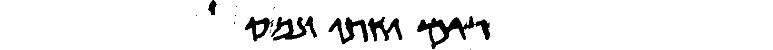

In [6]:
import_images = []
# import_images.append(prepareImg(cv2.imread('input_files_word_old/slice4.png'), 50))
import_images.append(prepareImg(cv2.imread('output_files/image-data/image-data/P583-Fg002-R-C01-R01-fused/slice2_binarize.png'), 50))
# import_images.append(prepareImg(cv2.imread('output_files/image-data/image-data/P583-Fg002-R-C01-R01-fused/slice3_binarize.png'), 50))
showarray(import_images[0])

### Cutting up the slice
Manually take an line slice and cut it up into characters

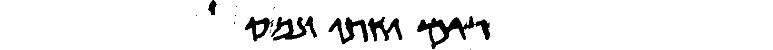

In [176]:
test_image = []
test_image.append(prepareImg(cv2.imread('output_files/image-data/image-data/P583-Fg002-R-C01-R01-fused/slice2_binarize.png'), 50))
showarray(test_image[0])

In [177]:
h, w = test_image[0].shape
h, w

(50, 773)

### Segment the line into different words

In [7]:
res = []
for i, img in enumerate(import_images):
    res = wordSegmentation(img, kernelSize=5, sigma=5, theta=7, minArea=30) # fix parameters

In [8]:
words = []
for (j, w) in enumerate(res):
    (wordBox, wordImg) = w
    (x, y, w, h) = wordBox
    if (w > 20):
        words.append(wordImg)

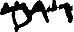

In [9]:
for word in words:
    showarray(word)

28


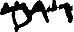

In [10]:
print(len(words[0][0]))
single_characters = []
single_characters.append(words[0])

single_characters.append(words[1][:,0:22])
single_characters.append(words[1][:,22:35])
single_characters.append(words[1][:,35:])

single_characters.append(words[2][:,0:17])
single_characters.append(words[2][:,17:40])
single_characters.append(words[2][:,40:60])
single_characters.append(words[2][:,60:])

single_characters.append(words[3][:,0:20])
single_characters.append(words[3][:,15:30])
single_characters.append(words[3][:,30:50])
single_characters.append(words[3][:,50:])

showarray(single_characters[8])
showarray(single_characters[9])
showarray(single_characters[10])
showarray(single_characters[11])
showarray(words[3])

In [182]:
word = words[1]
h, w = word.shape
num = 3
chars = []
for i in range(num):
    part = math.floor(w / num)
    char = word[:,part * i:(part * i) + part]
    shape = cv2.resize(char,(32,48))
    ret,thresh1 = cv2.threshold(shape,127,255,cv2.THRESH_BINARY)
    chars.append(thresh1)

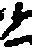

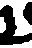

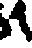

In [183]:
for char in chars:
    showarray(char)

In [184]:
# def get_char(word, x, y):
#     h, w = word.shape
#     chars = []
#     char = word[:,x:y]
#     char = word[:,part * i:(part * i) + part]
#     shape = cv2.resize(char,(32,48))
#     ret,thresh1 = cv2.threshold(shape,127,255,cv2.THRESH_BINARY)
#     chars.append(thresh1)

In [185]:
# chars = []
# chars.append(get_char(word[0], num = 1))
# chars.append(get_char(word[1], num = 1, part = 40))

In [186]:
fonts = []
for item in class_names:
    fonts.append(cv2.imread('habbakuk/' + item + '/standard.png'))

(48, 32)
Predicted:  [ 0.00535849  0.0051997   0.77364993  0.02055072  0.0022207   0.2642487
  0.00027877  1.9390318   0.02050119  0.00000008  1.1992946   0.07430928
  0.9622473   0.0038051  12.296309    0.13215472  0.00000046  0.10038348
  6.5523567   0.00004241  0.00001179  0.5021113   0.00007527  0.00020115
 54.50611     0.12194901 20.517593  ]
Index of class with highest probability:  24
Value of highest probability:  0.5450611
Name of predicted class:  Waw
habbabuk/Waw/standard.png


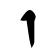

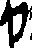

(48, 32)
Predicted:  [ 0.00173383  0.00028247 59.872047    0.00174139  0.03179203  0.00676285
  0.00000272  2.813651    0.00047715  0.00000004  0.45266905  0.04812029
  0.11385281  0.00445912 36.001354    0.00047696  0.00000028  0.05043071
  0.25792193  0.00004471  0.00011574  0.04271272  0.00000733  0.0000725
  0.10570393  0.11757078  0.07598995]
Index of class with highest probability:  2
Value of highest probability:  0.5987205
Name of predicted class:  Bet
habbabuk/Bet/standard.png


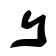

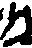

(48, 32)
Predicted:  [ 0.000165    0.00069765  1.8917911   0.00017808  0.01405093  0.00012537
  0.0000014   0.8063795   0.00009403  0.00000001  0.00040211  0.00049583
  0.00428613  0.11585202 96.833916    0.00004978  0.00000001  0.00944192
  0.00172659  0.00000004  0.00000053  0.00012088  0.0000013   0.00018437
  0.02080242  0.15431122  0.14493364]
Index of class with highest probability:  14
Value of highest probability:  0.96833915
Name of predicted class:  Pe
habbabuk/Pe/standard.png


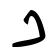

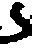

(48, 32)
Predicted:  [ 0.20424056  0.66718656  0.2804351   0.40235844  0.12249678  1.4620545
  0.03305825  1.0544441   0.11666106  0.00000808  0.04954266  0.01024809
  0.408651    0.18412758 13.821422    0.14308628  0.00004011  1.8325037
  0.05036116  0.00004273  0.00055637  0.05449355  0.03520315  0.01044935
 37.02997    15.17996    26.846397  ]
Index of class with highest probability:  24
Value of highest probability:  0.3702997
Name of predicted class:  Waw
habbabuk/Waw/standard.png


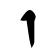

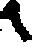

(48, 32)
Predicted:  [ 0.11652331  0.14349625  0.87736046  0.26156336  0.0634294   0.64537984
  0.00348812  2.439604    0.05032022  0.00000074  0.07335994  0.02192406
  0.5178912   0.12001654 48.339       0.10261143  0.00004499  0.80728465
  0.39684212  0.00013192  0.00016616  0.3199635   0.00354642  0.00467348
 21.72108    15.775945    7.1943464 ]
Index of class with highest probability:  14
Value of highest probability:  0.48339
Name of predicted class:  Pe
habbabuk/Pe/standard.png


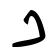

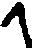

(48, 32)
Predicted:  [ 0.1285366   0.01849798 11.139913    0.0485313   0.12153364  0.44907945
  0.00818397  0.88030696  0.00988444  0.00000204  1.0701668   0.10987578
  0.4214209   0.01758177 77.67416     0.0212041   0.00000745  0.13598847
  1.7336442   0.00027231  0.00313883  0.5015266   0.00012447  0.00273209
  4.017095    0.3823334   1.1042691 ]
Index of class with highest probability:  14
Value of highest probability:  0.77674156
Name of predicted class:  Pe
habbabuk/Pe/standard.png


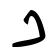

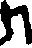

(48, 32)
Predicted:  [ 0.06138108  0.01544053  3.5782807   0.03156351  0.01867155  1.0065643
  0.00250112  1.8559505   0.01585427  0.00000019  1.5137572   0.03355534
  0.91929716  0.00315613 62.23771     0.00746607  0.00000135  0.10389267
  2.0576727   0.00006718  0.00156324  0.8879562   0.00017923  0.00020969
 20.090126    0.11712144  5.440056  ]
Index of class with highest probability:  14
Value of highest probability:  0.6223771
Name of predicted class:  Pe
habbabuk/Pe/standard.png


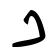

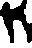

(48, 32)
Predicted:  [ 0.1229761   0.14835171  0.862666    0.24085957  0.09934946  1.0387961
  0.02754592  3.1412442   0.3833384   0.00000073  0.07064584  0.01036377
  0.44439244  0.04024227 33.27643     0.08778905  0.00002082  1.4903742
  0.07592345  0.00002326  0.00015449  0.07217093  0.010722    0.00458447
 27.124897    9.1284895  22.097652  ]
Index of class with highest probability:  14
Value of highest probability:  0.3327643
Name of predicted class:  Pe
habbabuk/Pe/standard.png


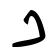

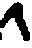

(48, 32)
Predicted:  [ 0.779049    0.10818569  5.330241    2.509781    0.04637789  1.7898738
  0.02073275 16.740871    1.2775129   0.00000032  0.808493    0.05394373
  0.71830386  0.0114252  21.181961    0.15207253  0.00001033  6.8071246
  0.41198906  0.00040477  0.00023118  0.31971306  0.0319137   0.00210827
 28.573872    2.0414243  10.282393  ]
Index of class with highest probability:  24
Value of highest probability:  0.2857387
Name of predicted class:  Waw
habbabuk/Waw/standard.png


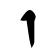

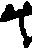

(48, 32)
Predicted:  [ 0.00072307  0.00652075  0.556257    0.00148875  0.02233586  0.00309914
  0.00002215  0.84651065  0.00342524  0.00000032  0.00098677  0.00197295
  0.06344263  0.08157514 92.17412     0.00335233  0.00000003  0.08427336
  0.00759619  0.00000002  0.00000193  0.00027228  0.0000331   0.00014173
  2.1638312   0.8479217   3.130093  ]
Index of class with highest probability:  14
Value of highest probability:  0.9217412
Name of predicted class:  Pe
habbabuk/Pe/standard.png


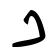

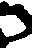

(48, 32)
Predicted:  [ 0.08882898  0.11653261  8.100276    0.03808     0.1446194   0.08932829
  0.00189542  4.8709083   0.0056941   0.00000133  0.13372608  0.0464129
  0.19320054  0.17248152 75.25031     0.06324425  0.00000422  0.22561595
  0.2343699   0.00007409  0.00116144  0.12114182  0.00042566  0.00447125
  4.5788937   2.668538    2.8497906 ]
Index of class with highest probability:  14
Value of highest probability:  0.7525031
Name of predicted class:  Pe
habbabuk/Pe/standard.png


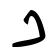

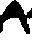

(48, 32)
Predicted:  [ 0.06572398  0.08143189  4.042674    0.05434905  0.14210778  0.08385319
  0.00137219  2.0778959   0.00787476  0.00000284  0.06456421  0.02486411
  0.11594976  0.21986924 86.71824     0.04606021  0.00000459  0.2985618
  0.11368731  0.00004185  0.00047715  0.03821784  0.00043958  0.00531181
  1.8744271   2.772366    1.1496398 ]
Index of class with highest probability:  14
Value of highest probability:  0.8671824
Name of predicted class:  Pe
habbabuk/Pe/standard.png


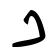

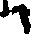

In [11]:
for character in single_characters:
#     char_pred = cv2.cvtColor(char, cv2.COLOR_BGR2GRAY)
    shape = cv2.resize(character,(32,48))
    ret, thresh1 = cv2.threshold(shape,127,255,cv2.THRESH_BINARY)
    
    char = thresh1
    char_pred = np.asarray(char[:], dtype='float32')
    print(char_pred.shape)
    char_pred = normalize(char_pred)
    char_pred = char_pred.reshape(-1, 48, 32,1)

    prediction = model.predict([char_pred])
    for i in range(len(prediction)):
        print('Predicted: ', prediction[i] * 100)
    highest_index = np.argmax(prediction)
    print('Index of class with highest probability: ',highest_index)
    print('Value of highest probability: ', prediction[0][highest_index])
    print('Name of predicted class: ', class_names[highest_index])
    print('habbabuk/' + class_names[highest_index] + '/standard.png')
    character_example = cv2.imread('habbakuk/' + str(class_names[highest_index]) + '/standard.png')
    showarray(character_example)
    showarray(char)

In [188]:
# for box in bounding_boxes:
#     xStart = box[2]
#     xEnd = box[0]
#     y = box[1]
#     winH = box[3] - y
#     winWidth = 5
#     while(xStart-winWidth >= xEnd) :
#         hit = False
#         winW = winWidth
#         a = 0
#         # While the image is not classified and the box has not reached the edge,
#         # increase window size
#         while(not hit and xStart-winW >= xEnd) :
#             newX = xStart - winW
#             # Draw the window
#             clone = img.copy()
#             cv2.rectangle(clone, (xStart, y), (newX, y + winH), (255, 0, 0), 2)
#             cv2.rectangle(clone, (xStart,y),(xEnd,y + winH), (0,255,0), 2)
#             cv2.imshow("Window", clone)
#             cv2.waitKey(0)
#             # Check if the CNN returns a high probability for a letter
#             # for prob in probabilities :
#             #     if prob >= 0.75 :
#             #         hit = True
#             #         xStart = newX
#             # # Increase size of window if nothing has been found
#             winW += 5
#             # this is done to ensure that the loop ends for now, because not
#             # connected to cnn yet.
#             hit = True
#             xStart = newX

In [189]:
# def get_resized_img(img, video_size):
#     width, height = video_size  # these are the MAX dimensions
#     video_ratio = width / height
#     img_ratio = img.size[0] / img.size[1]
#     if video_ratio >= 1:  # the video is wide
#         if img_ratio <= video_ratio:  # image is not wide enough
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#         else:  # image is wider than video
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#     else:  # the video is tall
#         if img_ratio >= video_ratio:  # image is not tall enough
#             height_new = int(width / img_ratio)
#             size_new = width, height_new
#         else:  # image is taller than video
#             width_new = int(height * img_ratio)
#             size_new = width_new, height
#     return np.asarray(img.resize(size_new, resample=Image.LANCZOS))

In [190]:
# char = cv2.cvtColor(char, char, cv2.COLOR_BGR2GRAY)